In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
from matplotlib import pyplot as plt

In [2]:
# load rankings data and clean a bit
rankings = pd.read_csv('Desktop/Python/Kaggle/WorldCup2018/fifa_ranking.csv')
rankings = rankings.loc[:, ['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted','rank_date',
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
rankings = rankings.replace({'IR Iran': 'Iran'})
rankings['weighted_points'] = rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted']+rankings['three_year_ago_weighted'] 
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

In [3]:
rankings.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0,0.0
2,3,Switzerland,SUI,0.0,1993-08-08,0.0,0.0,0.0
3,4,Sweden,SWE,0.0,1993-08-08,0.0,0.0,0.0
4,5,Argentina,ARG,0.0,1993-08-08,0.0,0.0,0.0


In [4]:
# load match info
matches  = pd.read_csv('Desktop/Python/Kaggle/WorldCup2018/results.csv')
matches = matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})
matches['date'] = pd.to_datetime(matches['date'])

In [5]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# load world cup info
world_cup = pd.read_csv('Desktop/Python/Kaggle/WorldCup2018/World Cup 2018 Dataset.csv')
world_cup = world_cup.loc[:, ['Team', 'Group', 'First match against',
                             'Second match against', 'Third match against']]
world_cup = world_cup.dropna(how='all')
world_cup = world_cup.replace({'IRAN': 'Iran',
                              'Costarica': 'Costa Rica',
                              'Porugal': 'Portugal',
                              'Columbia': 'Colombia',
                              'Korea': 'Korea Republic'})
world_cup = world_cup.set_index('Team')

In [7]:
world_cup

,Group,First match against,Second match against,Third match against
Team,,,,
Russia,A,Saudi Arabia,Egypt,Uruguay
Saudi Arabia,A,Russia,Uruguay,Egypt
Egypt,A,Uruguay,Russia,Saudi Arabia
Uruguay,A,Egypt,Saudi Arabia,Russia
Portugal,B,Spain,Morocco,Iran
Spain,B,Portugal,Iran,Morocco
Morocco,B,Iran,Portugal,Spain
Iran,B,Morocco,Spain,Portugal
France,C,Australia,Peru,Denmark


In [8]:
"""
feature extraction
"""

'\nfeature extraction\n'

In [9]:
# want to have the ranks for everyday
rankings = rankings.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()

In [10]:
# join the ranks
matches = matches.merge(rankings, left_on=['date', 'home_team'],
                       right_on=['rank_date', 'country_full'])
matches = matches.merge(rankings,
                       left_on=['date', 'away_team'],
                       right_on=['rank_date', 'country_full'],
                       suffixes=('_home', '_away'))

In [11]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,three_year_ago_weighted_home,weighted_points_home,rank_date_away,rank_away,country_full_away,country_abrv_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,0.0,0.0,1993-08-08,22.0,Uruguay,URU,0.0,0.0,0.0,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,0.0,0.0,1993-08-08,14.0,Mexico,MEX,0.0,0.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,0.0,0.0,1993-08-08,94.0,Venezuela,VEN,0.0,0.0,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,0.0,0.0,1993-08-08,86.0,Sierra Leone,SLE,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,0.0,0.0,1993-08-08,5.0,Argentina,ARG,0.0,0.0,0.0,0.0


In [12]:
# feature generation
matches['rank_difference'] = matches['rank_home'] - matches['rank_away']
matches['average_rank'] = (matches['rank_home']+matches['rank_away'])/2
matches['point_difference'] = matches['weighted_points_home'] + matches['weighted_points_away']
matches['score_difference'] = matches['home_score'] - matches['away_score']
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost
matches['is_stake'] = matches['tournament'] != 'Friendly'

In [13]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away,rank_difference,average_rank,point_difference,score_difference,is_won,is_stake
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,0.0,0.0,0.0,0.0,37.0,40.5,0.0,2,True,True
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,0.0,0.0,0.0,0.0,-6.0,11.0,0.0,0,False,False
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,0.0,0.0,0.0,0.0,-59.0,64.5,0.0,5,True,True
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,0.0,0.0,0.0,0.0,-21.0,75.5,0.0,1,True,False
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,0.0,0.0,0.0,0.0,62.0,36.0,0.0,-2,False,True


In [14]:
# I tried earlier rest days but it did not turn to be useful
max_rest = 30
matches['rest_days'] = matches.groupby('home_team').diff()['date'].dt.days.clip(0, max_rest).fillna(max_rest)

In [15]:
# I tried earlier the team as well but that did not make a difference either
matches['wc_participant'] = matches['home_team'] * matches['home_team'].isin(world_cup.index.tolist())
matches['wc_participant'] = matches['wc_participant'].replace({'': 'Other'})
matches = matches.join(pd.get_dummies(matches['wc_participant']))

In [16]:
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,Portugal,Russia,Saudi Arabia,Senegal,Serbia,Spain,Sweden,Switzerland,Tunisia,Uruguay
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
5,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
6,1993-08-08,Zimbabwe,Swaziland,2,0,Friendly,Harare,Zimbabwe,False,1993-08-08,...,0,0,0,0,0,0,0,0,0,0
7,1993-08-09,Guinea,Sierra Leone,4,0,Friendly,Conakry,Guinea,False,1993-08-09,...,0,0,0,0,0,0,0,0,0,0
8,1993-08-11,Faroe Islands,Norway,0,7,Friendly,Toftir,Faroe Islands,False,1993-08-11,...,0,0,0,0,0,0,0,0,0,0
9,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,1993-08-11,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# dummies = pd.get_dummies(matches['wc_participant'])
# dummies

In [18]:
"""
Modeling with simple Logistic regression
"""

'\nModeling with simple Logistic regression\n'

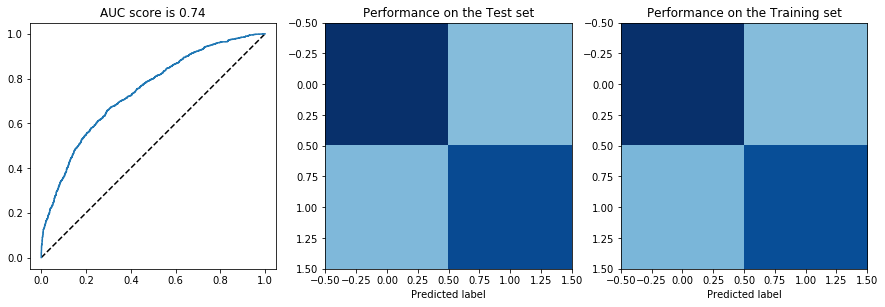

In [19]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = matches.loc[:, ['average_rank', 'rank_difference', 'point_difference',
                      'is_stake']], matches['is_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([('polynomial_features', features),
                 ('logistic_regression', logreg)])
model = model.fit(X_train, y_train)

# figures
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0,1], [0,1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap='Blues', clim=(0, cm.max()))

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap='Blues', clim=(0, cm.max()))
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

Stakes distribution in the wrong predictions
True     0.581356
False    0.418644
Name: is_stake, dtype: float64
Stakes distribution overall
True     0.615618
False    0.384382
Name: is_stake, dtype: float64


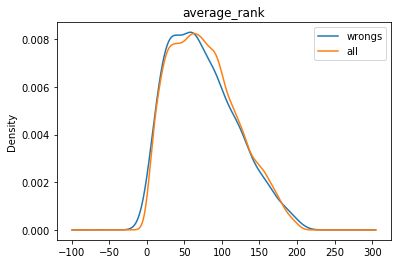

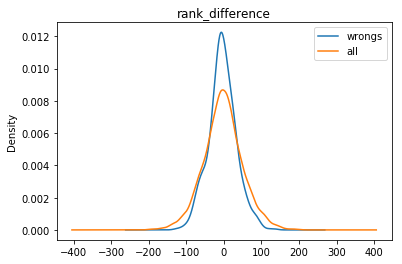

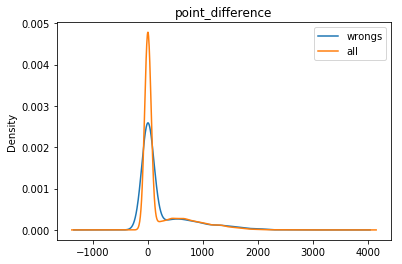

In [20]:
features = ['average_rank', 'rank_difference', 'point_difference']
wrongs = y_test != model.predict(X_test)

for feature in features:
    plt.figure()
    plt.title(feature)
    X_test.loc[wrongs, feature].plot.kde()
    X.loc[:, feature].plot.kde()
    plt.legend(['wrongs', 'all'])
    
print("Stakes distribution in the wrong predictions")
print(X_test.loc[wrongs, 'is_stake'].value_counts() / wrongs.sum())
print("Stakes distribution overall")
print(X['is_stake'].value_counts() / X.shape[0])

In [21]:
"""
World Cup simulation

Group rounds

"""

'\nWorld Cup simulation\n\nGroup rounds\n\n'

In [22]:
# Lets define a small margin when we safer to predict draw then win
margin = 0.05

# lets define the rankings at the time of the world cup
world_cup_rankings = rankings.loc[(rankings['rank_date']==rankings['rank_date'].max()) 
                                  & rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

In [23]:
from itertools import combinations

opponents = ['First match against', 'Second match against', 'Third match against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}:".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away,'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank+opp_rank)/2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        home_win_prob = model.predict_proba(row)[:,1][0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print('Draw')
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting group B:___
Portugal vs. Spain:Draw
Portugal vs. Morocco:Portugal wins with 0.68
Portugal vs. Iran:Portugal wins with 0.66
Spain vs. Morocco:Spain wins with 0.65
Spain vs. Iran:Spain wins with 0.63
Morocco vs. Iran:Draw
___Starting group D:___
Argentina vs. Iceland:Argentina wins with 0.59
Argentina vs. Croatia:Argentina wins with 0.57
Argentina vs. Nigeria:Argentina wins with 0.71
Iceland vs. Croatia:Draw
Iceland vs. Nigeria:Iceland wins with 0.62
Croatia vs. Nigeria:Croatia wins with 0.63
___Starting group E:___
Brazil vs. Switzerland:Draw
Brazil vs. Costa Rica:Brazil wins with 0.61
Brazil vs. Serbia:Brazil wins with 0.66
Switzerland vs. Costa Rica:Switzerland wins with 0.59
Switzerland vs. Serbia:Switzerland wins with 0.64
Costa Rica vs. Serbia:Draw
___Starting group F:___
Germany vs. Mexico:Germany wins with 0.57
Germany vs. Sweden:Germany wins with 0.61
Germany vs. Korea Republic:Germany wins with 0.76
Mexico vs. Sweden:Draw
Mexico vs. Korea Republic:Mexico wins with 0

In [24]:
"""
Single-elimination rounds
"""

'\nSingle-elimination rounds\n'

In [32]:
# world_cup1 = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
# world_cup1

,index,Team,Group,First match against,Second match against,Third match against,points,total_prob
0,0,Poland,H,Senegal,Colombia,Japan,7,1.882492
1,1,Colombia,H,Japan,Poland,Senegal,7,1.752410
2,2,Senegal,H,Poland,Japan,Colombia,3,1.493700
3,3,Japan,H,Colombia,Senegal,Poland,0,0.871398
4,4,Belgium,G,Panama,Tunisia,England,7,1.881681
5,5,England,G,Tunisia,Panama,Belgium,7,1.753704
6,6,Tunisia,G,England,Belgium,Panama,3,1.547030
7,7,Panama,G,Belgium,England,Tunisia,0,0.817585
8,8,Germany,F,Mexico,Sweden,Korea Republic,9,1.938778
9,9,Mexico,F,Germany,Korea Republic,Sweden,4,1.670608


In [25]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model.predict_proba(row)[:,1][0]
        if model.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Uruguay vs. Spain: Spain wins with probability 0.53
France vs. Croatia: France wins with probability 0.56
Brazil vs. Mexico: Brazil wins with probability 0.57
Belgium vs. Colombia: Belgium wins with probability 0.56
Egypt vs. Portugal: Portugal wins with probability 0.73
Denmark vs. Argentina: Argentina wins with probability 0.54
Switzerland vs. Germany: Germany wins with probability 0.54
England vs. Poland: Poland wins with probability 0.53


___Starting of the quarterfinal___
Spain vs. France: France wins with probability 0.52
Brazil vs. Belgium: Brazil wins with probability 0.50
Portugal vs. Argentina: Portugal wins with probability 0.50
Germany vs. Poland: Germany wins with probability 0.53


___Starting of the semifinal___
France vs. Brazil: Brazil wins with probability 0.53
Portugal vs. Germany: Germany wins with probability 0.52


___Starting of the final___
Brazil vs. Germany: Germany wins with probability 0.51




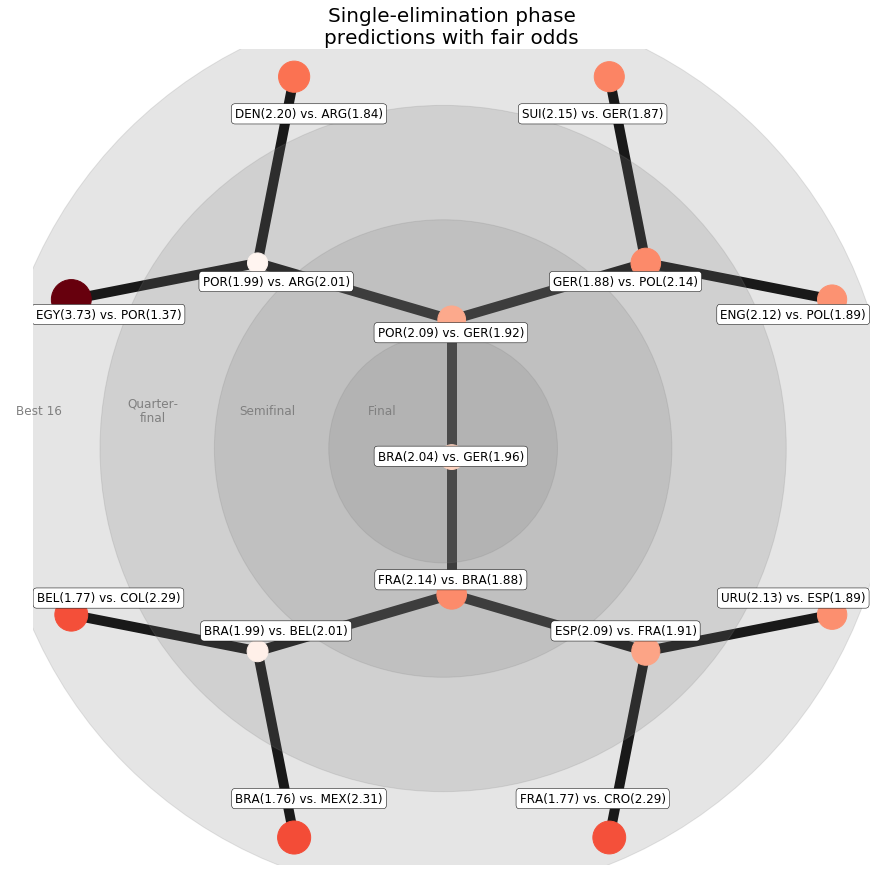

In [36]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

node_sizes = pd.DataFrame(list(reversed(odds)))
scale_factor = 0.3 # for visualization
G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi', args='')
centre = pd.DataFrame(pos).mean(axis=1).mean()

plt.figure(figsize=(15, 15))
ax = plt.subplot(1,1,1)
# add circles 
circle_positions = [(235, 'black'), (180, 'blue'), (120, 'red'), (60, 'yellow')]
[ax.add_artist(plt.Circle((centre, centre), 
                          cp, color='grey', 
                          alpha=0.2)) for cp, c in circle_positions]

# draw first the graph
nx.draw(G, pos, 
        node_color=node_sizes.diff(axis=1)[1].abs().pow(scale_factor), 
        node_size=node_sizes.diff(axis=1)[1].abs().pow(scale_factor)*2000, 
        alpha=1, 
        cmap='Reds',
        edge_color='black',
        width=10,
        with_labels=False)

# draw the custom node labels
shifted_pos = {k:[(v[0]-centre)*0.9+centre,(v[1]-centre)*0.9+centre] for k,v in pos.items()}
nx.draw_networkx_labels(G, 
                        pos=shifted_pos, 
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=dict(zip(reversed(range(len(labels))), labels)))

texts = ((10, 'Best 16', 'black'), (70, 'Quarter-\nfinal', 'blue'), (130, 'Semifinal', 'red'), (190, 'Final', 'yellow'))
[plt.text(p, centre+20, t, 
          fontsize=12, color='grey', 
          va='center', ha='center') for p,t,c in texts]
plt.axis('equal')
plt.title('Single-elimination phase\npredictions with fair odds', fontsize=20)
plt.show()

In [53]:
"""
updated by lastest round of 16 list
Uruguay 28 vs Portugal 24
Francce 20 vs Argintina 16
Brazil 12 vs Mexico 9
England 5 vs Japan 3
Spain 25  vs Russia 31
Croatia 17 vs Denmark 21
Sweden 10  vs Swithzland 13
Colombia 1 vs Belgium 4

pairing = [28,24,20,16,12,9,5,3,25,31,17,21,10,13,1,4]
"""

'\nupdated by lastest round of 16 list\nUruguay 28 vs Portugal 24\nFrancce 20 vs Argintina 16\nBrazil 12 vs Mexico 9\nEngland 5 vs Japan 3\nSpain 25  vs Russia 31\nCroatia 17 vs Denmark 21\nSweden 10  vs Swithzland 13\nColombia 1 vs Belgium 4\n\npairing = [28,24,20,16,12,9,5,3,25,31,17,21,10,13,1,4]\n'

In [58]:
pairing = [28,24,20,16,12,9,5,3,25,31,17,21,10,13,1,4]
#world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
#next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
#next_round_wc = next_round_wc.reset_index()
next_round_wc = world_cup.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model.predict_proba(row)[:,1][0]
        if model.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Uruguay vs. Portugal: Portugal wins with probability 0.56
France vs. Argentina: Argentina wins with probability 0.52
Brazil vs. Mexico: Brazil wins with probability 0.57
England vs. Japan: England wins with probability 0.73
Spain vs. Russia: Spain wins with probability 0.78
Croatia vs. Denmark: Denmark wins with probability 0.56
Sweden vs. Switzerland: Switzerland wins with probability 0.61
Colombia vs. Belgium: Belgium wins with probability 0.58


___Starting of the quarterfinal___
Portugal vs. Argentina: Portugal wins with probability 0.50
Brazil vs. England: Brazil wins with probability 0.55
Spain vs. Denmark: Spain wins with probability 0.50
Switzerland vs. Belgium: Belgium wins with probability 0.52


___Starting of the semifinal___
Portugal vs. Brazil: Brazil wins with probability 0.51
Spain vs. Belgium: Belgium wins with probability 0.54


___Starting of the final___
Brazil vs. Belgium: Brazil wins with probability 0.50




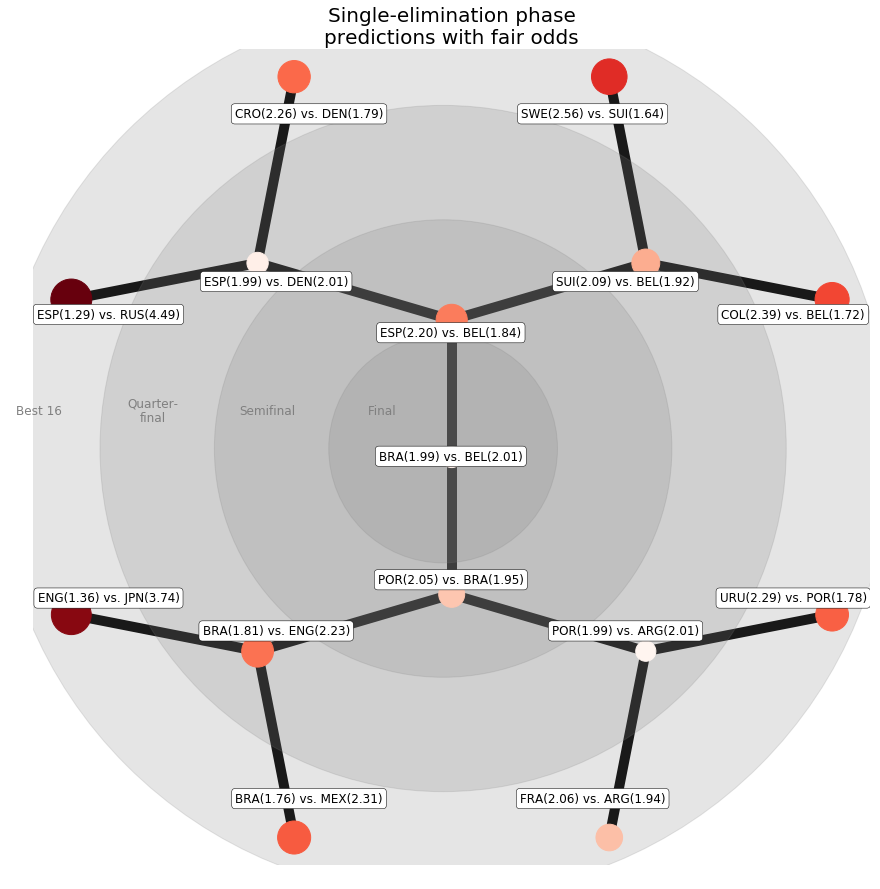

In [59]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

node_sizes = pd.DataFrame(list(reversed(odds)))
scale_factor = 0.3 # for visualization
G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi', args='')
centre = pd.DataFrame(pos).mean(axis=1).mean()

plt.figure(figsize=(15, 15))
ax = plt.subplot(1,1,1)
# add circles 
circle_positions = [(235, 'black'), (180, 'blue'), (120, 'red'), (60, 'yellow')]
[ax.add_artist(plt.Circle((centre, centre), 
                          cp, color='grey', 
                          alpha=0.2)) for cp, c in circle_positions]

# draw first the graph
nx.draw(G, pos, 
        node_color=node_sizes.diff(axis=1)[1].abs().pow(scale_factor), 
        node_size=node_sizes.diff(axis=1)[1].abs().pow(scale_factor)*2000, 
        alpha=1, 
        cmap='Reds',
        edge_color='black',
        width=10,
        with_labels=False)

# draw the custom node labels
shifted_pos = {k:[(v[0]-centre)*0.9+centre,(v[1]-centre)*0.9+centre] for k,v in pos.items()}
nx.draw_networkx_labels(G, 
                        pos=shifted_pos, 
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=dict(zip(reversed(range(len(labels))), labels)))

texts = ((10, 'Best 16', 'black'), (70, 'Quarter-\nfinal', 'blue'), (130, 'Semifinal', 'red'), (190, 'Final', 'yellow'))
[plt.text(p, centre+20, t, 
          fontsize=12, color='grey', 
          va='center', ha='center') for p,t,c in texts]
plt.axis('equal')
plt.title('Single-elimination phase\npredictions with fair odds', fontsize=20)
plt.show()